In [12]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sebas\Desktop\Github\Programming\UCL\Software Udvikling\Deep Learning\27Feb\riceClassification.csv')
print(f"Is null:\n{df.isnull().sum()}")
df.iloc[0:5]

Is null:
id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [23]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

array([1.44079562, 1.45313658, 1.46595015, ..., 2.92539573, 2.94121614,
       2.96724528])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline

import time
tic = time.perf_counter()

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Time: {(time.perf_counter() - tic):.5f} LogisticRegression with PCA accuracy: {test_acc:.3f}')

pipe_lr_noPCA = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr_noPCA.fit(X_train, y_train)
y_pred = pipe_lr_noPCA.predict(X_test)
test_acc = pipe_lr_noPCA.score(X_test, y_test)
print(f'Time: {(time.perf_counter() - tic):.5f} LogisticRegression without PCA accuracy: {test_acc:.3f}')

pipe_ppn = make_pipeline(StandardScaler(), PCA(n_components=2), Perceptron())
pipe_ppn.fit(X_train, y_train)
y_pred = pipe_ppn.predict(X_test)
test_acc = pipe_ppn.score(X_test, y_test)
print(f'Time: {(time.perf_counter() - tic):.5f} Perceptron with PCA accuracy: {test_acc:.3f}')

Time: 0.13756 LogisticRegression with PCA accuracy: 0.993
Time: 0.20536 LogisticRegression without PCA accuracy: 1.000
Time: 0.24767 Perceptron with PCA accuracy: 0.992


In [39]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)

    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')
    
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [5904 7189], Acc.: 0.997
Fold: 02, Class distr.: [5904 7189], Acc.: 0.994
Fold: 03, Class distr.: [5904 7189], Acc.: 0.994
Fold: 04, Class distr.: [5904 7189], Acc.: 0.995
Fold: 05, Class distr.: [5904 7189], Acc.: 0.996
Fold: 06, Class distr.: [5904 7189], Acc.: 0.997
Fold: 07, Class distr.: [5904 7189], Acc.: 0.995
Fold: 08, Class distr.: [5904 7189], Acc.: 0.995
Fold: 09, Class distr.: [5904 7190], Acc.: 0.997
Fold: 10, Class distr.: [5904 7190], Acc.: 0.994

CV accuracy: 0.995 +/- 0.001


In [40]:
# The above code block is just a manual implementatio of the cross_val_score method
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.99656357 0.99381443 0.99381443 0.995189   0.99587629 0.99656357
 0.99450172 0.99450172 0.99656121 0.99381018]
CV accuracy: 0.995 +/- 0.001


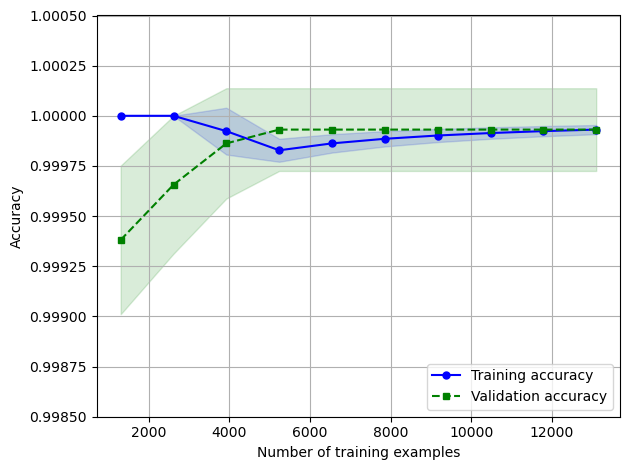

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9985, 1.0005])
plt.tight_layout()
plt.show()